In [2]:
import pandas as pd

# Read the CSV file and create a DataFrame
df = pd.read_csv('data.csv')

# Print the DataFrame
df.head()


,otr1,otr2,didHigherOtrWin
0,0.289004,0.349408,False
1,0.712091,0.330474,True
2,0.723753,0.187200,True
3,0.403791,1.313647,False
4,0.000000,0.339552,False


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df[['otr1', 'otr2']]  # Features
y = df['didHigherOtrWin']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Print the predicted probabilities
print(y_pred_prob)


C:\Users\gupta\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[0.06480607 0.70474942 0.27147723 ... 0.99386256 0.10235368 0.3518991 ]


In [4]:
from sklearn.metrics import accuracy_score

# Predict the class labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)


Accuracy: 0.8542677448337825


In [6]:
X_test

,otr1,otr2
9629,0.339552,0.610636
23992,0.294984,0.042728
7337,0.077104,0.140233
7467,0.138060,1.030433
6235,0.496355,0.491602
...,...,...
27818,0.319830,0.186493
14180,0.783380,0.425820
23471,1.639106,0.527115
24468,0.401222,0.587185


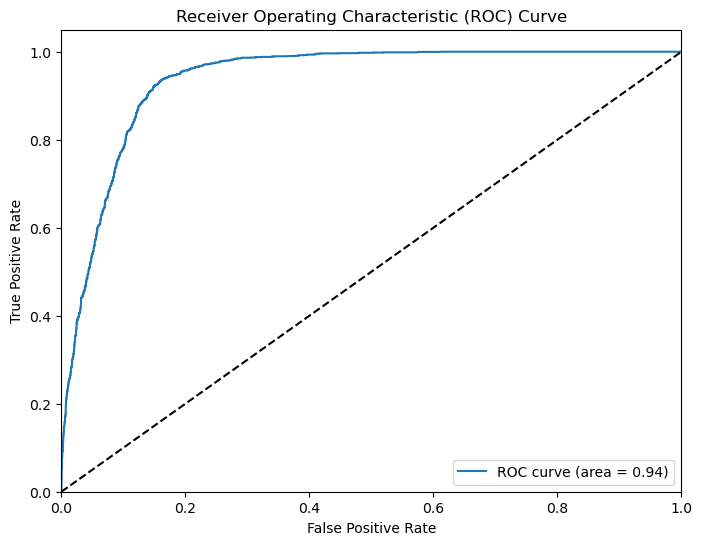

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the predicted probabilities for the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [11]:
def calc_prob_higher_win(score_1, score_2):
    # Create a DataFrame with the given otr1 and otr2 values
    data = pd.DataFrame({'otr1': [score_1], 'otr2': [score_2]})
    
    # Predict the probability of didHigherOtrWin being true
    prob = model.predict_proba(data)[:, 1]
    
    return prob[0]

In [14]:
otr1_value = 0.289004
otr2_value = 0.349408
probability = calc_prob_higher_win(otr1_value, otr2_value)
print("Probability of the higher column being true:", probability)


Probability of the higher column being true: 0.23009608432704176
